######## FIRST GENERAL INSIGHT
                                                text  label
0  They look good and stick good! I just don't li...    4.0
1  These stickers work like the review says they ...    5.0
2  These are awesome and make my phone look so st...    5.0
3  Item arrived in great time and was in perfect ...    4.0
4  awesome! stays on, and looks great. can be use...    5.0
######## Total: 
Amount of reviews:  194439
######## DESCRIPTION
          text          label
count   194439  194439.000000
unique  194186            NaN
top                       NaN
freq        99            NaN
mean       NaN       4.129912
std        NaN       1.222499
min        NaN       1.000000
25%        NaN       4.000000
50%        NaN       5.000000
75%        NaN       5.000000
max        NaN       5.000000
######## DATA COMPLETENESS
Missing/Empty review text: 99
Missing review text as percentage: 0.05% 
Missing rating information 0
Missing rating information as percentage: 0.00%
After re

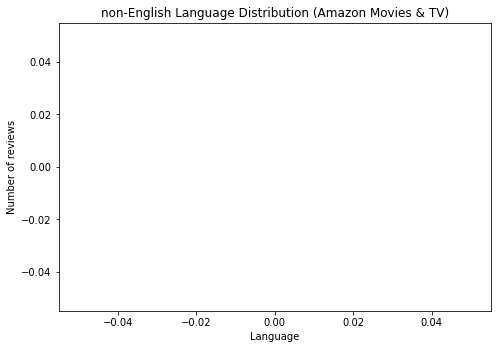

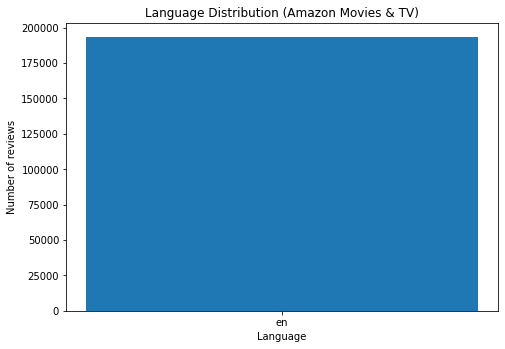

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [1]:
from Scripts import loading as dl, profiling as pf, cleaning as cl


input_link = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
df = dl.load_amazon_full(input_link)


print('######## FIRST GENERAL INSIGHT')
print(df.head())
pf.get_review_count(df)
pf.get_descr(df)


print('######## DATA COMPLETENESS')
pf.get_missing_text(df)
pf.get_missing_label(df)
df = cl.proceed_data_completion(df)


print('######## DUPLICATE DETECTION')
pf.get_duplicates(df)
df = cl.drop_duplicates(df)


# LINGUISTIC AFFILIATION
print('######## LINGUISTIC AFFILIATION')
df = cl.remove_non_english(df)
pf.show_lang_dist(df, 'amazon_movie_lang_non_eng_dist', 'non-English Language Distribution (Amazon Movies & TV)', 0)
pf.show_lang_dist(df, 'amazon_movie_lang_all_dist', 'Language Distribution (Amazon Movies & TV)', 1)


# OTHER HEURISTICS: based on exceptions
print('######## OTHER HEURISTICS')
df = df[~df.text.str.contains(r'^&#((15|16|20)[0-9]{2,3});*')]
print('After removing from other cleaning heuristics: ', len(df))


In [2]:
print('######## PREPROCESSING')
df.head()

,text,label,LANGUAGE
0,They look good and stick good! I just don't li...,4.0,en
1,These stickers work like the review says they ...,5.0,en
2,These are awesome and make my phone look so st...,5.0,en
3,Item arrived in great time and was in perfect ...,4.0,en
4,"awesome! stays on, and looks great. can be use...",5.0,en


In [ ]:
# STORING VIA PICKLING
print('######## STORING')
# Finally keeping only the wanted properties
df = df[['text', 'label']]
df.to_pickle('../Data/amazon_phone.pkl')
print('to pickle done')
